# Pràctica 8: Recommeder Systems

#### NOM: Albert Suso Marco
#### NIU: 1456635

In [1]:
! pip install lenskit

     |████████████████████████████████| 102kB 3.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 17.7MB 231kB/s 
     |████████████████████████████████| 133kB 42.7MB/s 
  Created wheel for lenskit: filename=lenskit-0.11.1-cp36-none-any.whl size=91425 sha256=0c2ade9e071387e9833b384320b6f2b24d22c5c991eb3505ccb3c983b05fe2a6
  Stored in directory: /root/.cache/pip/wheels/16/97/dd/af293191d9eca1b34822aff23b1131af10b92c97e989f088e1
Successfully built lenskit
  Created wheel for pickle5: filename=pickle5-0.0.11-cp36-cp36m-linux_x86_64.whl size=218606 sha256=63a696898361ce6d7e8f80072b6ac03a1eae3251407d9d4aec3b9d227b558867
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5
  Found existing installation: pyarrow 0.14.1
    Uninstalling pyarrow-0.14.1

## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent **dijous abans de les 23:59**, és a dir, quasibé tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, **sense ZIP**, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta pràctica tractará els següents temes:

* A. Recomenadors No Personalitzats **(20%)**
* B. Recomenadors k-NN **(30%)**
* C. Recomenadors SVD **(50%)**

## Datasets

#### MovieLens-Latest-Small

Farem ús de la base de dades de qualificacions de pel·lícules de [MovieLens](https://grouplens.org/datasets/movielens/). Existeixen varies mides del dataset. Per aprendre'n com funciona la base dels recomenadors, farem servir la versió petita. **Us la heu de descarregar**:

- [Small](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip): 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. (Last updated 9/2018.). [Aqui](https://paperswithcode.com/sota/collaborative-filtering-on-movielens-100k) podeu veure els darrers articles publicats al respecte.

#### MovieLens-Latest
La última versió d'aquesta base de dades, **que no farem servir**, però posem com a referència
- [Full](http://files.grouplens.org/datasets/movielens/ml-latest.zip): 27,000,000 ratings and 1,100,000 tag applications applied to 58,000 movies by 280,000 users. Includes tag genome data with 14 million relevance scores across 1,100 tags. Last updated 9/2018.

#### Netflix Grand-Prize
Teniu una explicació del que va passar a la [wikipedia](https://en.wikipedia.org/wiki/Netflix_Prize). Les dades d'entrenament contenien 100,480,507 ratings that 480,189 users gave to 17,770 movies.

- [challenge 2006-2009](https://www.kaggle.com/netflix-inc/netflix-prize-data)

Com a orientació, les dades actuals de Netflix és de més de 150,000,000 d'usuaris i varis milers películes i sèries de televisió.



## Llibreria

Existeixen moltes llibreries i codis per a realitzar sistemes recomenadors. A continuació us en poso el que farem servir:

#### LensKit Python
- [LKPy](https://github.com/lenskit/lkpy)

Per instal·lar la versió actual, podeu fer servir Anaconda:

`conda install -c lenskit lenskit`

O amb pip:

`pip install lenskit`

#### Altres llibreries interessants
- [Surprise](http://surpriselib.com/) 4.5k stars a github. Molt popular.
- A la web, [paperswithcode](https://paperswithcode.com/), teniu codi actual utilitzat pels darreres grups de recerca en articles científics. Hi trobareu un recopilatori de repositoris i trobareu resumit un ranking dels mètodes per tal d'ajudar a la recerca. En el cas de [recomenadors](https://paperswithcode.com/task/recommendation-systems), podeu veure quina és la tendència actual.





## Introducció

En aquesta pràctica aprendrem sobre sistemes recomenadors, com són les dades, quins mètodes existeixen per a predir qualificacions (ratings) a pel·lícules, fer recomenacions basat en les qualificacions, i veure les diferents formes per evaluar-ho.

Actualment, són sistemes molt utilitzats i gairebé podriem dir que esencials, en diferents sectors online (e.g. YouTube videos, Netflix shows, Amazon products).

Podem veure-hi dues tendències:
<img src="https://miro.medium.com/max/998/1*O_GU8xLVlFx8WweIzKNCNw.png" width="500px">
* **Content filtering**: les recomenacions provenen de descriure el contingut dels items i llavors recomenar items similars.
* **Collaborative filtering**: les recomenacions provenen de l'ús dels items pels clients, és a dir, trobar relacions entre quins items agraden a quins usuaris i recomenar aquells llavors.

També es poden distingir clarament dos tipus de formes d'extreure les qualificacions:
* **Explicit rating**: els usuaris posen nota o qualifiquen les pel·lícules segons el seu gust.
* **Implicit rating**: les qualificacions provenen de l'ús de l'usuari, sense que aquest hagi d'especificar si li agrada o no. És més fàcil d'aconseguir, però no es té un grau de certesa tan gran com en el cas anterior. Un exemple són els clicks en una botiga online, on es solen recomenar nous items segons el nostre historial de visualitzacions.


Per tal de fer-ho més interactiu, us comparteixo un fitxer amb algunes qualificacions meves: `pep-movie-ratings.csv`. El que intentarem és trobar una pel·lícula a veure que ens pugui agradar tan a vosaltres com a mi, per això, el primer que haureu de fer és **omplir la vostra pròpia llista de qualificacions** omplint el fitxe `my-movie-ratings.csv`. 

Els diferents apartats farán ús de diferents tipus de recomenacions:

* El primer apartat aplicarem recomenacions no personalitzades, és a dir, mètodes que no tinguin en compte el que ens agradi a nosaltres, sinó recomenacions genèriques basades amb el que li ha agradat als altres usuaris. Ens servirà com a baseline per si no es coneix res d'algun usuari (per exemple al principi quan es donen d'alta, o veure tendències globals)
  També aprendrem a com evaluar sistemes que tinguin en compte el ranking
* En el següent apartat, aplicarem mètodes de recomenació basats en k-NN. Hi aplicarem mètodes de filtratge colaboratiu User-User i Item-Item.
  <img src="https://miro.medium.com/max/1400/1*QvhetbRjCr1vryTch_2HZQ.jpeg" width="500">
  Aquí aplicarem mètodes que requereixin un aprenentatge sobre dades dels clients als que volem predir.
* Finalment, provarem mètodes basats en la factorització de matrius (SVD). A partir d'aquests, s'han desenvolupat la majories dels mètodes més utilitzats en la actualitat.
  <img src="https://miro.medium.com/max/5130/1*b4M7o7W8bfRRxdMxtFoVBQ.png" width="600">

Començarem descarregant el dataset, descomprimint-lo i [llegint les dades del dataset](https://lkpy.readthedocs.io/en/stable/datasets.html) (el contingut ha de trobar-se a *./ml-latest-small/*)

In [2]:
import lenskit.datasets as ds
import pandas as pd

data = ds.MovieLens('ml-latest-small/')
print("Successfully installed dataset.")

És important entendre com s’estructura un conjunt de dades i assegurar-se que el conjunt de dades s’importa correctament. Imprimim algunes files de les dades de classificació.

Com veieu, MovieLens emmagatzema el número d'identificació d'un usuari (a la primera fila, poques files semblen ser totes les valoracions de l'usuari 1),
 l'identificador de l'element (en aquest cas, cada identificador és una pel·lícula diferent), la qualificació que l'usuari ha donat a aquest element ,
 i un segell de temps per a quan es va deixar la qualificació.

In [3]:
rows_to_show = 10   # <-- Try changing this number to see more rows of data
data.ratings.timestamp = pd.to_datetime(data.ratings.timestamp, unit='s')
data.tags.timestamp = pd.to_datetime(data.tags.timestamp, unit='s')

display(data.ratings)  # user - item - rating - timestamp
display(data.movies)   # item - title - genre
display(data.tags)     # user - item - tag - timestamp
display(data.links)    # item - id of imdb - id of tmdbmy-latest-small

,user,item,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51
...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12


,title,genres
item,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


,user,item,tag,timestamp
0,2,60756,funny,2015-10-24 19:29:54
1,2,60756,Highly quotable,2015-10-24 19:29:56
2,2,60756,will ferrell,2015-10-24 19:29:52
3,2,89774,Boxing story,2015-10-24 19:33:27
4,2,89774,MMA,2015-10-24 19:33:20
...,...,...,...,...
3678,606,7382,for katie,2007-02-11 22:46:59
3679,606,7936,austere,2007-03-08 22:18:54
3680,610,3265,gun fu,2017-05-03 20:39:44
3681,610,3265,heroic bloodshed,2017-05-03 20:39:38


,imdbId,tmdbId
item,,
1,114709,862
2,113497,8844
3,113228,15602
4,114885,31357
5,113041,11862
...,...,...
193581,5476944,432131
193583,5914996,445030
193585,6397426,479308


Un aspecte important dels conjunts de dades del sistema de recomanacions és com gestionen les dades que falten.
Els sistemes de recomanació solen tenir MOLTES de dades que falten, perquè la majoria d’usuaris només valoren algunes pel·lícules i la majoria de pel·lícules només reben valoracions d’uns quants usuaris.

Per exemple, podem veure que l’usuari núm. 1 va proporcionar una qualificació de 4.0 a l’element número 1 i
que va proporcionar una qualificació de 4.0 a l’element núm. 3. Però no hi ha cap valoració per a l’element número 2,
cosa que significa que l’usuari núm. 1 mai no l’ha puntuat. És útil saber que aquest conjunt de dades no emmagatzema
cap element sense classificar, en lloc de, per exemple, emmagatzemar elements sense classificar com a 0 valoracions.

Però aquí tenim un altre petit problema: noms com el item 1 i el item 2 no són molt descriptius, de manera que no podem saber quines són aquestes pel·lícules. Afortunadament, MovieLens també té una taula de dades anomenada "movies" que inclou informació sobre títols i gèneres. Podem obtenir una visió més significativa d’aquestes dades unint els dos fitxers de dades.

In [4]:
joined_data = data.ratings.join(data.movies[['title', 'genres']], on='item')
display(joined_data)

,user,item,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi


Ara podem veure els títols i els gèneres de cada ítem.


## A. Recomenadors No Personalitzats (20%)

Ara que tenim puntuacions, creem conjunts genèrics de pel·lícules recomanades per a qualsevol espectador, sense conèixer els seus gustos.


A continuació posarem un exemple, a partir del que podeu crear altres búsquedes sobre el cataleg de pel·licules i ratings.

Algunes funcions de pandas que us poden ajudar:

* per ajuntar taules segons una columna, per exemple un id

  `.join(data.movies[['genres', 'title']], on='item')`


* per fer diferents tipus d'agregacions sobre les dades

  `.agg(count=('user', 'size'), rating=('rating', 'mean'), ..., title=('title', 'first'))`


* per convertir/codificar una columna de text en multiples columnes one-hot

 `.str.get_dummies('|')`


* per ordernar les files

  `.sort_values(by="rating")`
  
  
* per extreue el any del timestamp quan es va fer la qualificació
  
  `df['year_timestamp'] = df['timestamp'].dt.year`
  
* per extreure el any del titol (en cas que hi sigui)

  `df['year'] = df.Book.str.extract('\((\d{4})\)', expand=False)`
  

#### Preguntes

**Explica en cada una de les preguntes si el resultat es l'esperat o no**

1. Escull 5 pel·lícules al atzar i ordenales per puntuació
2. Mostra les 5 pel·lícules amb més puntuació
3. Mostra les 5 pel·lícules amb més quantitat de ratings
4. Mostra les 5 pel·lícules amb més puntuació amb almenys 50 ratings 
5. Mostra (any a any) les pel·lícules amb més puntuació
6. Mostra per categories, les 5 pel·lícules amb més puntuació i almenys 10 ratings
7. Inventa una altra forma de escollir pel·lícules.



#### Respostes

# 1.

El resultat és l'esperat en el sentit que les 5 pelicules seleccionades apareixen junt amb la seva puntuació mitjana i ordenades per puntuació, que és el que volíem.

In [5]:
pelicules = data.movies.sample(5)['title']
info_pelicules = joined_data.loc[joined_data['title'].isin(pelicules)]
info_pelicules = info_pelicules[['title', 'rating']]
nota_mitjana = info_pelicules.groupby("title").agg(rating=('rating', 'mean'))
nota_mitjana = nota_mitjana.sort_values(by='rating', ascending=False)

display(nota_mitjana)

,rating
title,
Tyler Perry's I Can Do Bad All by Myself (2009),5.000000
Changing Lanes (2002),3.333333
Rachel Getting Married (2008),2.750000
Inferno (1980),2.500000
Pushing Hands (Tui shou) (1992),2.000000


# 2.

El resultat és l'esperat en el sentit que, al haver tantes películes a la base de dades i no haver exigit cap restricció sobre el numero de valoracions que ha de tenir una película per a poder ser escollida, és normal que les millor películes tinguin totes la nota màxima (segurament nomès les hauràn valorat una o dues persones).

Posteriorment a escriure això, he comprovat el numero de vots que ha rebut cada película i, efectivament, nomès un vot per película.

In [6]:
info_pelicules = joined_data[['title', 'rating']]
nota_mitjana = info_pelicules.groupby("title").agg(rating=('rating', 'mean'), num_votes=('title', 'size'))
nota_mitjana = nota_mitjana.sort_values(by='rating', ascending=False)

nota_mitjana.head(5)

,rating,num_votes
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1


# 3.

El resultat es esperat en el sentit que totes les películes que apareixen entre les més votades son molt famoses. Això si, potser haguès esperat més vots per cadascuna.

In [7]:
info_pelicules = joined_data[['title']]
num_votes = info_pelicules.groupby("title").agg(num_votes=('title', 'size'))
num_votes = num_votes.sort_values(by='num_votes', ascending=False)

num_votes.head(5)

,num_votes
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278


# 4.

Veiem que aquesta vegada els resultats son mes coherents. Aquí si que podem dir que estem davant de "les millor películes" (tot i que ja sabem que això és subjectiu).

Els resultats son esperats en el sentit que veiem que, aquesta vegada, les millors películes tenen puntuacions molt bones (sense ser perfectes) i un alt numero de vots.

In [8]:
info_pelicules = joined_data[['title', 'rating']]
nota_mitjana = info_pelicules.groupby("title").agg(rating=('rating', 'mean'), num_votes=('title', 'size'))
nota_mitjana = nota_mitjana[nota_mitjana['num_votes'] >= 50]
nota_mitjana = nota_mitjana.sort_values(by='rating', ascending=False)

nota_mitjana.head(5)

,rating,num_votes
title,,
"Shawshank Redemption, The (1994)",4.429022,317
"Godfather, The (1972)",4.289062,192
Fight Club (1999),4.272936,218
Cool Hand Luke (1967),4.271930,57
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),4.268041,97


# 5.

Altre cop, la resposta obtinguda és "esperable" (tot l'esperable que podría ser la resposta a "Quina es la millor pel·licula de cada any que hi ha en el dataset?"), degut a que en general veiem que les pelicules amb major nota mitja sempre tenen pocs vots.

In [9]:
info_pelicules = joined_data[['title', 'rating']]
info_pelicules['year'] = info_pelicules.title.str.extract('\((\d{4})\)', expand=False)

nota_mitjana = info_pelicules.groupby(["year", "title"]).agg(rating=('rating', 'mean'), num_votes=('title', 'size'))
nota_mitjana = nota_mitjana.sort_values(by=['year', 'rating'], ascending=[True, False])
nota_mitjana = nota_mitjana.reset_index()

nota_mitjana = nota_mitjana.groupby(["year"]).first()

display(nota_mitjana)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,rating,num_votes
year,,,
1902,"Trip to the Moon, A (Voyage dans la lune, Le) ...",3.50,5
1903,The Great Train Robbery (1903),2.50,2
1908,The Electric Hotel (1908),4.00,1
1915,"Birth of a Nation, The (1915)",2.00,1
1916,"20,000 Leagues Under the Sea (1916)",3.75,2
...,...,...,...
2014,Delirium (2014),5.00,1
2015,A Perfect Day (2015),5.00,1
2016,All Yours (2016),5.00,1


# 6.

Suposo que el resultat torna a ser esperat, en el sentit que les notes no baixen del 4, i les películes tendeixen a tenir poques valoracions.

In [13]:
genre_info = joined_data[['title', 'rating', 'genres']].genres.str.get_dummies('|')
genre_info = genre_info.drop("(no genres listed)", axis=1)

for key in genre_info:
    info_pelicules[key] = genre_info[key]
    pelis_genere = info_pelicules[info_pelicules[key] == 1].groupby("title").agg(rating=('rating', 'mean'), num_votes=('title', 'size'))
    pelis_genere = pelis_genere[pelis_genere['num_votes'] >= 10]
    pelis_genere = pelis_genere.sort_values(by='rating', ascending=False)
    
    print("Les 5 millors películes del génere", key, "amb almenys 10 valoracions son:")
    display(pelis_genere.head(5))
    print("\n\n")
    

Les 5 millors películes del génere Action amb almenys 10 valoracions son:


,rating,num_votes
title,,
All Quiet on the Western Front (1930),4.350000,10
Once Upon a Time in the West (C'era una volta il West) (1968),4.305556,18
Elite Squad (Tropa de Elite) (2007),4.300000,10
Logan (2017),4.280000,25
Fight Club (1999),4.272936,218





Les 5 millors películes del génere Adventure amb almenys 10 valoracions son:


,rating,num_votes
title,,
Lawrence of Arabia (1962),4.300000,45
"Outlaw Josey Wales, The (1976)",4.250000,18
"Princess Bride, The (1987)",4.232394,142
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Yojimbo (1961),4.230769,13





Les 5 millors películes del génere Animation amb almenys 10 valoracions son:


,rating,num_votes
title,,
Creature Comforts (1989),4.250000,12
Mary and Max (2009),4.200000,10
Persepolis (2007),4.181818,11
Grave of the Fireflies (Hotaru no haka) (1988),4.156250,16
Spirited Away (Sen to Chihiro no kamikakushi) (2001),4.155172,87





Les 5 millors películes del génere Children amb almenys 10 valoracions son:


,rating,num_votes
title,,
Batman: Mask of the Phantasm (1993),4.115385,13
Toy Story 3 (2010),4.109091,55
"Grand Day Out with Wallace and Gromit, A (1989)",4.089286,28
Fantastic Mr. Fox (2009),4.083333,18
Laputa: Castle in the Sky (Tenkû no shiro Rapyuta) (1986),4.062500,24





Les 5 millors películes del génere Comedy amb almenys 10 valoracions son:


,rating,num_votes
title,,
His Girl Friday (1940),4.392857,14
It Happened One Night (1934),4.321429,14
"Philadelphia Story, The (1940)",4.310345,29
Living in Oblivion (1995),4.307692,13
Louis C.K.: Live at the Beacon Theater (2011),4.300000,10





Les 5 millors películes del génere Crime amb almenys 10 valoracions son:


,rating,num_votes
title,,
"Shawshank Redemption, The (1994)",4.429022,317
Double Indemnity (1944),4.323529,17
Elite Squad (Tropa de Elite) (2007),4.300000,10
"Godfather, The (1972)",4.289062,192
Fight Club (1999),4.272936,218





Les 5 millors películes del génere Documentary amb almenys 10 valoracions son:


,rating,num_votes
title,,
"Fog of War: Eleven Lessons from the Life of Robert S. McNamara, The (2003)",4.307692,13
Hoop Dreams (1994),4.293103,29
Inside Job (2010),4.291667,12
Crumb (1994),4.205882,17
Exit Through the Gift Shop (2010),4.038462,13





Les 5 millors películes del génere Drama amb almenys 10 valoracions son:


,rating,num_votes
title,,
Secrets & Lies (1996),4.590909,11
Guess Who's Coming to Dinner (1967),4.545455,11
Paths of Glory (1957),4.541667,12
"Streetcar Named Desire, A (1951)",4.475000,20
"Celebration, The (Festen) (1998)",4.458333,12





Les 5 millors películes del génere Fantasy amb almenys 10 valoracions son:


,rating,num_votes
title,,
"Princess Bride, The (1987)",4.232394,142
Brazil (1985),4.177966,59
Monty Python and the Holy Grail (1975),4.161765,136
Untitled Spider-Man Reboot (2017),4.156250,16
Spirited Away (Sen to Chihiro no kamikakushi) (2001),4.155172,87





Les 5 millors películes del génere Film-Noir amb almenys 10 valoracions son:


,rating,num_votes
title,,
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.333333,27
Double Indemnity (1944),4.323529,17
Touch of Evil (1958),4.264706,17
Notorious (1946),4.250000,20
"Third Man, The (1949)",4.229167,24





Les 5 millors películes del génere Horror amb almenys 10 valoracions son:


,rating,num_votes
title,,
Rosemary's Baby (1968),4.171875,32
"Silence of the Lambs, The (1991)",4.161290,279
"Shining, The (1980)",4.082569,109
Dead Alive (Braindead) (1992),4.050000,10
Evil Dead II (Dead by Dawn) (1987),4.044118,34





Les 5 millors películes del génere IMAX amb almenys 10 valoracions son:


,rating,num_votes
title,,
"Dark Knight, The (2008)",4.238255,149
Toy Story 3 (2010),4.109091,55
Inception (2010),4.066434,143
Captain Phillips (2013),4.047619,21
"Dark Knight Rises, The (2012)",3.993421,76





Les 5 millors películes del génere Musical amb almenys 10 valoracions son:


,rating,num_votes
title,,
Hedwig and the Angry Inch (2000),4.181818,11
"King and I, The (1956)",4.166667,12
Meet Me in St. Louis (1944),4.100000,10
Singin' in the Rain (1952),4.074468,47
Across the Universe (2007),4.045455,11





Les 5 millors películes del génere Mystery amb almenys 10 valoracions son:


,rating,num_votes
title,,
Rear Window (1954),4.261905,84
"Usual Suspects, The (1995)",4.237745,204
"Third Man, The (1949)",4.229167,24
To Catch a Thief (1955),4.217391,23
Chinatown (1974),4.211864,59





Les 5 millors películes del génere Romance amb almenys 10 valoracions son:


,rating,num_votes
title,,
His Girl Friday (1940),4.392857,14
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.333333,27
It Happened One Night (1934),4.321429,14
"Philadelphia Story, The (1940)",4.310345,29
Harold and Maude (1971),4.288462,26





Les 5 millors películes del génere Sci-Fi amb almenys 10 valoracions son:


,rating,num_votes
title,,
Logan (2017),4.280000,25
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Star Wars: Episode V - The Empire Strikes Back (1980),4.215640,211
"Matrix, The (1999)",4.192446,278
Brazil (1985),4.177966,59





Les 5 millors películes del génere Thriller amb almenys 10 valoracions son:


,rating,num_votes
title,,
Elite Squad (Tropa de Elite) (2007),4.300000,10
Fight Club (1999),4.272936,218
Touch of Evil (1958),4.264706,17
Rear Window (1954),4.261905,84
"Departed, The (2006)",4.252336,107





Les 5 millors películes del génere War amb almenys 10 valoracions son:


,rating,num_votes
title,,
Paths of Glory (1957),4.541667,12
Ran (1985),4.433333,15
All Quiet on the Western Front (1930),4.350000,10
"Fog of War: Eleven Lessons from the Life of Robert S. McNamara, The (2003)",4.307692,13
Lawrence of Arabia (1962),4.300000,45





Les 5 millors películes del génere Western amb almenys 10 valoracions son:


,rating,num_votes
title,,
Once Upon a Time in the West (C'era una volta il West) (1968),4.305556,18
"Outlaw Josey Wales, The (1976)",4.250000,18
High Noon (1952),4.210526,19
High Plains Drifter (1973),4.181818,11
Lone Star (1996),4.157895,19


# 7.

La cerca que fem a continuació respón a la pregunta: "Mostra, cada any, la película que ha rebut mes valoracions noves".

Els resultats son esperables en el sentit de que en general la pelicula mes votada en cada any es del any en qüestió o de l'anterior. En aquest sentit, sorpren la presencia de "The Godfather" i de "Shawshank redemption" a la llista els anys 2013 i 2017 (quan aquestes películes, tot i ser bonísimes, son antigues).

In [11]:
info_pelicules = joined_data[['title', 'rating', 'timestamp']]
info_pelicules['year_timestamp'] = info_pelicules['timestamp'].dt.year
info_pelicules = info_pelicules.drop('timestamp', axis=1)

num_votes = info_pelicules.groupby(["year_timestamp", "title"]).agg(num_votes=('title', 'size'))
num_votes = num_votes.sort_values(by=['year_timestamp', 'num_votes'], ascending=[True, False])
num_votes = num_votes.reset_index()

num_votes = num_votes.groupby(["year_timestamp"]).first()

display(num_votes)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,num_votes
year_timestamp,,
1996,Batman (1989),83
1997,Independence Day (a.k.a. ID4) (1996),27
1998,Air Force One (1997),6
1999,Saving Private Ryan (1998),15
2000,Star Wars: Episode IV - A New Hope (1977),31
2001,"Crouching Tiger, Hidden Dragon (Wo hu cang lon...",14
2002,"Lord of the Rings: The Fellowship of the Ring,...",13
2003,"Lord of the Rings: The Two Towers, The (2002)",18
2004,"Lord of the Rings: The Return of the King, The...",12


## B. Recomenadors k-NN (30%)

Fins ara hem trobat pel·lícules basades en cerques i aplicant filtres al contingut dels items, sense conèixer res dels nostres gustos o dels gustos de la resta d'usuaris que han qualificat una pel·lícula. En aquest apartat, buscarem pel·lícules basant-nos en el historial i les qualificacions dels usuaris, i amb aquest coneixement en traurem les pel·lícules relevants. Per aquest motiu se'n anomenen **filtres colaboratius**.

#### Models
Veurem els models que apareixen a la llibreria de LensKit, i utilitzarem els següents metodes:
* [**Bias**](https://lkpy.readthedocs.io/en/stable/bias.html): Tot i no tractar-se d'un mètode colaboratiu perse, ens pot servir com a baseline. El model bàsic prediu $s$ fent servir $s(u,i) = \mu + b_i + b_u$, on $\mu$ és el score promig de tot el dataset, $b_i$ és el residual promig del item $i$, i  $b_u$ és el bias de usuari, que es calcula com el residual promig de les prediccions del usuari $u$. A la documentació veureu clarament la notació. Veureu que conté un parametre de `damping` (amortiment) que es pot interpretar que està amortint els usuaris i elements amb poca informació cap a una mitjana global en lloc de permetre’ls prendre valors extrems basats en poques valoracions.

* [**ItemItem**](https://lkpy.readthedocs.io/en/stable/knn.html#module-lenskit.algorithms.item_knn): Aquest algorisme agrupa els items similars en funció de les valoracions que els usuaris han fet de elles. Inventat per Amazon el 1998. Està pensat per ser un mètode eficient quan les nostres dades contenen més usuaris que items. Amb més usuaris que elements, cada item sol tenir més puntuacions que cada usuari, de manera que la puntuació mitjana d’un article normalment no canvia tan ràpidament. Això condueix a distribucions de classificació més estables, de manera que no cal reconstruir-lo amb tanta freqüència.

* [**UserUser**](https://lkpy.readthedocs.io/en/stable/knn.html#module-lenskit.algorithms.user_knn): Aquest algorisme agrupa usuaris similars en funció de les seves valoracions de pel·lícules. Té parametres guiant com l'algoritme decideix si un grup concret d'usuaris hauria de ser agrupat mitjançant l'establiment d'una mida de veinatge mínima i màxima. Els clústers realment petits representen grups de persones que no són molt similars a molts altres. Així, mantenint la mida del clúster petit, veurem més recomanacions poc convencionals. Però si augmentem la mida mínima del clúster, probablement es donaran recomanacions més populars convencionalment. Els "millors" valors depenen del que vulguem que es comporti el sistema de recomanació AI. Volem sorprendre amb recomanacions que d’altra manera no sabrien? O busquen una expressió de qualitat més segura?





En aquest apartat farem aquests models explicats a classe per tal de buscar quines pel·lícules ens podràn agradar més a tots dos. Per això, farem ús dels fitxers: `pep-movie-ratings.csv` i `my-movie-ratings.csv` (que l'heu d'omplir amb N qualificacions de pel·lícules que hagueu vist).

In [14]:
pd_pep_movie_ratings = pd.read_csv('pep-movie-ratings.csv', delimiter=";").dropna().set_index("item")
pd_my_movie_ratings = pd.read_csv('my-movie-ratings.csv', delimiter="\t").dropna().set_index("item")

In [15]:
from lenskit.algorithms import Recommender
from lenskit.algorithms.basic import Popular

num_recs = 10  #<---- This is the number of recommendations to generate. You can change this if you want to see more recommendations

popular = Popular() #These two numbers set the minimum (3) and maximum (15) number of neighbors to consider. These are considered "reasonable defaults," but you can experiment with others too
popular = Recommender.adapt(popular)
popular.fit(data.ratings)

print("Set up a Popular algorithm!")

Set up a Popular algorithm!


In [16]:
# Here, -1 tells it that it's not an existing user in the set, that we're giving new ratings, 
# while num_recs is how many recommendations it should generate
pep_recs_popular = popular.recommend(-1, 
                                     num_recs, 
                                     ratings=pd_pep_movie_ratings["ratings"]) 

In [17]:
print("POPULAR")
display(pep_recs_popular.join(data.movies[['genres', 'title']], on='item'))

POPULAR


,item,score,genres,title
0,318,317.0,Crime|Drama,"Shawshank Redemption, The (1994)"
1,593,279.0,Crime|Horror|Thriller,"Silence of the Lambs, The (1991)"
2,260,251.0,Action|Adventure|Sci-Fi,Star Wars: Episode IV - A New Hope (1977)
3,589,224.0,Action|Sci-Fi,Terminator 2: Judgment Day (1991)
4,1196,211.0,Action|Adventure|Sci-Fi,Star Wars: Episode V - The Empire Strikes Back...
5,2858,204.0,Drama|Romance,American Beauty (1999)
6,47,203.0,Mystery|Thriller,Seven (a.k.a. Se7en) (1995)
7,780,202.0,Action|Adventure|Sci-Fi|Thriller,Independence Day (a.k.a. ID4) (1996)
8,150,201.0,Adventure|Drama|IMAX,Apollo 13 (1995)
9,4993,198.0,Adventure|Fantasy,"Lord of the Rings: The Fellowship of the Ring,..."


#### Preguntes

1. Instancia i aprèn els models Populars, Bias, ItemItem-knn i UserUser-knn. Explica els parametres que tenen aquests models.
2. Llegeix la base de dades `pep-movie-ratings.csv` i `my-movie-ratings.csv` (recorda a omplir aquest últim)
3. Fés prediccions amb el teu perfil d'usuari amb els models anteriors. Modifica els parametres i mostra quina influència tenen sobre els resultats. 
4. Fés 10 prediccions amb cada un dels mètodes. Apareixen pel·lícules en comú?
5. Com podriem fer per obtenir recomenacions conjuntes?

#### Respostes

# 1.

El model **Popular** implementa la recomanació en funció de la popularitat dels items. Permet triar un únic paràmetre "selector" que ha de ser un objecte d'una classe subclasse de "CandidateSelector" que ha d'implementar la selecció de ítems candidats a ser recomanats.

El model **Bias** implementa la recomanació del item $i$ a l'usuari $u$ en funció del valor obtingut en l'expressió $s(u,i)=\mu+b_i+b_u$, on $\mu$ es la mitjana de tots els rating del dataset, $b_i$ es la mitjana de desviacions dels ratings del item $i$ respecte de la mitjana $\mu$, i $b_u$ es la mitjana de desviacions dels ratings del usuari $u$ respecte de la suma $\mu+b_i$. Als denominadors dels termes $b_i$ i $b_u$ sel's hi afegeixen unes constants $\beta_i$ i $\beta_u$ que fan tendir cap a la mitjana global els ítems/usuaris amb poques valoracions. Els paràmetres del model son "items" (bool; permet triar si es calcula $b_i$ o no), "users" (bool; permet triar si es calcula $b_u$ o no) i "damping" (number or 2-tuple of numbers; permet especificar els coeficients $\beta_i$ i $\beta_u$).

El model **ItemItem** implementa la recomanació usant un item-based filtering basat en l'algoritme k-NN. Els paràmetres del model son "nnbrs" (int; numero maxim de veins que pot tenir un item per tal de puntuarlo), "min_nbrs" (int; numero minim de veins que pot tenir un item per tal de puntuarlo), "min_sim" (double; valor minim de similaritat que ha de tenir un item per a considererlo veí), "save_nbrs" (double; numero de veins que podem guardar per a cada item), "center" (bool; permet escollir si normalitzar els vectors de rating) i "aggregate" (permet escollir el tipus d'agregat a fer).

Finalment, el model **UserUser** implementa la recomanació usant un user-based filtering basat en l'algoritme k-NN. Té els mateixos paràmetres que el model ItemItem.

A continuació instanciem i entrenem els 4 models.

In [18]:
from lenskit.algorithms import Recommender
from lenskit.algorithms.basic import Popular
from lenskit.algorithms.bias import Bias
from lenskit.algorithms.item_knn import ItemItem
from lenskit.algorithms.user_knn import UserUser


popular = Popular()
popular.fit(data.ratings)

bias = Bias(items=True, users=True, damping=2)
bias = Recommender.adapt(bias)
bias.fit(data.ratings)

itemItem = ItemItem(nnbrs=20, min_nbrs=3, min_sim=0.15, center=True, aggregate='weighted-average')
itemItem = Recommender.adapt(itemItem)
itemItem.fit(data.ratings)

userUser = UserUser(nnbrs=20, min_nbrs=3, min_sim=0.05, center=True, aggregate='weighted-average')
userUser = Recommender.adapt(userUser)
userUser.fit(data.ratings)

# 2.

In [19]:
pd_pep_movie_ratings = pd.read_csv('pep-movie-ratings.csv', delimiter=";").dropna().set_index("item")
pd_my_movie_ratings = pd.read_csv('my-movie-ratings.csv', delimiter="\t").dropna().set_index("item")

display(pd_pep_movie_ratings)
display(pd_my_movie_ratings)

,title,genres,ratings
item,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,5.0
110,Braveheart (1995),Action|Drama|War,5.0
...,...,...,...
6754,Underworld (2003),Action|Fantasy|Horror,2.0
6155,How to Lose a Guy in 10 Days (2003),Comedy|Romance,3.0
106696,Frozen (2013),Adventure|Animation|Comedy|Fantasy|Musical|Rom...,3.0


,title,genres,ratings
item,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,5.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,3.0
...,...,...,...
1729,Jackie Brown (1997),Crime|Drama|Thriller,3.0
77561,Iron Man 2 (2010),Action|Adventure|Sci-Fi|Thriller|IMAX,2.0
1320,Alien³ (a.k.a. Alien 3) (1992),Action|Horror|Sci-Fi|Thriller,2.0


# 3.

Tot i que no mostro tots els resultats de les proves (degut a que ocuparía massa), les observacions que he fer respecte de l'efecte dels paràmetres son:

* Per al model **bias**, quant mes alt el valor del dumping películes més conegudes et recomana. Per a valors molt baixos de dumping et recomana películes que no ha vist casi ningú.

* Per als models **ItemItem** i **UserUser**, he observat que quant més pujes els valors dels paràmetres "min_nbrs" i "min_sim" mes augmenta la qualitat de les recomanacions.

In [20]:
my_recs_popular = popular.recommend(-1, num_recs, ratings=pd_my_movie_ratings["ratings"])
print("Les recomanacions obtingudes amb el popular recommender son:")
display(my_recs_popular.join(data.movies[['genres', 'title']], on='item'))


my_recs_bias = bias.predict_for_user(-1, data.movies.index.values.tolist(), ratings=pd_my_movie_ratings["ratings"])
my_recs_bias = my_recs_bias.to_frame()
my_recs_bias.columns = ["recommender_score"]
my_recs_bias.index.name = "item"
print("\n\nLes recomanacions obtingudes amb el bias recommender son:")
display(my_recs_bias.join(data.movies[['genres', 'title']], on='item').sort_values(by="recommender_score", ascending=False).head(10))


my_recs_itemItem = itemItem.predict_for_user(-1, data.movies.index.values.tolist(), ratings=pd_my_movie_ratings["ratings"])
my_recs_itemItem = my_recs_itemItem.to_frame()
my_recs_itemItem.columns = ["recommender_score"]
my_recs_itemItem.index.name = "item"
print("\n\nLes recomanacions obtingudes amb el itemItem recommender son:")
display(my_recs_itemItem.join(data.movies[['genres', 'title']], on='item').sort_values(by="recommender_score", ascending=False).head(10))

my_recs_userUser = userUser.predict_for_user(-1, data.movies.index.values.tolist(), ratings=pd_my_movie_ratings["ratings"])
my_recs_userUser = my_recs_userUser.to_frame()
my_recs_userUser.columns = ["recommender_score"]
my_recs_userUser.index.name = "item"
print("\n\nLes recomanacions obtingudes amb el userUser recommender son:")
display(my_recs_userUser.join(data.movies[['genres', 'title']], on='item').sort_values(by="recommender_score", ascending=False).head(10))

Les recomanacions obtingudes amb el popular recommender son:


,item,score,genres,title
0,50,204.0,Crime|Mystery|Thriller,"Usual Suspects, The (1995)"
1,780,202.0,Action|Adventure|Sci-Fi|Thriller,Independence Day (a.k.a. ID4) (1996)
2,150,201.0,Adventure|Drama|IMAX,Apollo 13 (1995)
3,457,190.0,Thriller,"Fugitive, The (1993)"
4,592,189.0,Action|Crime|Thriller,Batman (1989)
5,2028,188.0,Action|Drama|War,Saving Private Ryan (1998)
6,588,183.0,Adventure|Animation|Children|Comedy|Musical,Aladdin (1992)
7,2762,179.0,Drama|Horror|Mystery,"Sixth Sense, The (1999)"
8,380,178.0,Action|Adventure|Comedy|Romance|Thriller,True Lies (1994)
9,364,172.0,Adventure|Animation|Children|Drama|Musical|IMAX,"Lion King, The (1994)"




Les recomanacions obtingudes amb el bias recommender son:


,recommender_score,genres,title
item,,,
6460,3.868396,Drama,"Trial, The (Procès, Le) (1962)"
177593,3.868262,Crime|Drama,"Three Billboards Outside Ebbing, Missouri (2017)"
1041,3.791267,Drama,Secrets & Lies (1996)
318,3.791158,Crime|Drama,"Shawshank Redemption, The (1994)"
1178,3.761030,Drama|War,Paths of Glory (1957)
1104,3.754456,Drama,"Streetcar Named Desire, A (1951)"
3451,3.752806,Drama,Guess Who's Coming to Dinner (1967)
2239,3.743340,Comedy|Drama,Swept Away (Travolti da un insolito destino ne...
31364,3.725538,Crime|Drama|Mystery|Thriller,Memories of Murder (Salinui chueok) (2003)




Les recomanacions obtingudes amb el itemItem recommender son:


,recommender_score,genres,title
item,,,
3735,4.484617,Crime|Drama,Serpico (1973)
1203,4.448382,Drama,12 Angry Men (1957)
1244,4.410085,Comedy|Drama|Romance,Manhattan (1979)
3030,4.409071,Action|Adventure,Yojimbo (1961)
3451,4.402591,Drama,Guess Who's Coming to Dinner (1967)
81156,4.357760,Action|Comedy|Documentary,Jackass 3D (2010)
1221,4.345402,Crime|Drama,"Godfather: Part II, The (1974)"
858,4.335271,Crime|Drama,"Godfather, The (1972)"
914,4.323453,Comedy|Drama|Musical|Romance,My Fair Lady (1964)




Les recomanacions obtingudes amb el userUser recommender son:


,recommender_score,genres,title
item,,,
174053,4.588341,Drama|Horror|Mystery|Sci-Fi|Thriller,Black Mirror: White Christmas (2014)
27156,4.569766,Action|Animation|Drama|Fantasy|Sci-Fi,Neon Genesis Evangelion: The End of Evangelion...
177593,4.463037,Crime|Drama,"Three Billboards Outside Ebbing, Missouri (2017)"
1683,4.451133,Drama|Romance,"Wings of the Dove, The (1997)"
3451,4.425050,Drama,Guess Who's Coming to Dinner (1967)
3677,4.367084,Documentary,Baraka (1992)
4406,4.327114,Crime|Drama|Western,"Man Who Shot Liberty Valance, The (1962)"
3983,4.289129,Drama|Romance,You Can Count on Me (2000)
3030,4.287678,Action|Adventure,Yojimbo (1961)


# 4.

Ja hem mostrat les 10 recomanacions de cada model a l'apartat anterior. 

Algunes repeticions si que hi han ("Three Billboards Outside Ebbing, Missouri", "woman in the dunes", "Guess who's coming to dinner", "Yojimbo"), però la majoría son diferents. En la meva opinió les recomanacions més acertades son les aconseguidas amb el recomanador UserUser.

# 5.
Una forma molt senzilla d'aconseguir recomanacions conjuntes sería fent la mitjana de les score dels diferents recomanadors, i recomanant les películes amb la mitjana més alta. Ho implemento a continuació:

In [21]:
import copy

my_recs_bias_j = my_recs_bias.join(data.movies[['title']], on='item').sort_values(by="title", ascending=False)
my_recs_itemItem_j = my_recs_itemItem.join(data.movies[['title']], on='item').sort_values(by="title", ascending=False)
my_recs_userUser_j = my_recs_userUser.join(data.movies[['title']], on='item').sort_values(by="title", ascending=False)

my_recs_fusion = copy.copy(my_recs_bias_j)
my_recs_fusion["recommender_score"] += my_recs_itemItem_j["recommender_score"] + my_recs_userUser_j["recommender_score"]
my_recs_fusion["recommender_score"] /= 3

display(my_recs_fusion.sort_values(by="recommender_score", ascending=False).head(10))

,recommender_score,title
item,,
3451,4.193482,Guess Who's Coming to Dinner (1967)
318,4.101691,"Shawshank Redemption, The (1994)"
3030,4.066080,Yojimbo (1961)
858,4.055293,"Godfather, The (1972)"
1221,4.030701,"Godfather: Part II, The (1974)"
1203,4.020364,12 Angry Men (1957)
6460,3.975828,"Trial, The (Procès, Le) (1962)"
6791,3.966604,Babette's Feast (Babettes gæstebud) (1987)
527,3.924648,Schindler's List (1993)


## C. Recomenadors SVD (50%)

En aquest últim apartat, veurem com evaluar aquests models. A més, també instanciarem una de les families de recomenadors més utilitzats en l'actualitat.

#### Models

Al setembre del 2009, [Netflix va atorgar un premi de 1.000.000 de dòlars](https://en.wikipedia.org/wiki/Netflix_Prize) a un equip que havia desenvolupat un algorisme que millorava les prediccions de qualificació en més d’un 10%. El tercer lloc va quedar en una entrada individual de Simon Funk - FunkSVD.

Tenint en compte la matriu de valoracions dels usuaris a diferents pel·lícules, l'objectiu final és omplir les valoracions desconegudes amb prediccions, de manera que puguem agafar la màxima d'aquestes prediccions com a recomanacions. 

Aquest mètodes ho aconsegueixen mitjançant la introducció d’un conjunt d’entitats intermediàries conegudes com a factors latents, que són apresos automàticament. Per entendre-ho millor, podem pensar que són propietats dels items que poden agradar o no als usuaris: cada factor latent és un nou atribut per valorar una pel·lícula. Per exemple, una pel·lícula pot ser més dramàtica o menys, més graciosa o gens, més llarga o curta, amb actors coneguts o desconeguts.. I cada una d'elles pot influir en la valoració d’un usuari positiva o negativament. Tenint en compte aquestes informacions, es podrà reconstruir la matriu *completa* de valoracions dels usuaris i restaurants mitjançant la multiplicació de matrius. En el següent enllaç teniu una explicació detallada del mètode [funksvd](https://towardsdatascience.com/personalised-restaurant-recommendations-using-funksvd-3beff200b01c).

Farem servir aquests models:

* [**FunkSVD**](https://lkpy.readthedocs.io/en/stable/mf.html#funksvd): FunkSVD és un tipus de factorització de matrius com SVD que utilitza un descens de gradient estocàstic, per entrenar les matrius de característiques d'usuari i la matriu de característiques de matrius. En general, no es recomana utilitzar-lo en aplicacions o experiments nous; els algoritmes basats en ALS (mínims quadrats alternats) són menys sensibles als hiperparàmetres i actualment amb TensorFlow proporcionen un entrenament del descens de gradient més optimitzada del mateix model de predicció.

* [**BiasedMF**](https://lkpy.readthedocs.io/en/stable/mf.html#lenskit.algorithms.als.BiasedMF): factorització de matriu esbiaixada entrenada amb mínims quadrats alternats. Es tracta d’un algorisme orientat a la predicció adequat per a dades amb feedback explícites (ratings).

* [**ImplicitMF**](https://lkpy.readthedocs.io/en/stable/mf.html#lenskit.algorithms.als.ImplicitMF): factorització de matriu implícita entrenada amb mínims quadrats alternats. Aquest algorisme genera "prediccions", però no són a una escala significativa. Si les seves dades d'entrada contenen valors de classificació, s'utilitzaran com a valors de "confiança"; en cas contrari, la confiança serà 1 per cada article classificat.


#### Crossvalidació
La crossvalidació també té aspectes interessants, ja que no només s'han de separar els conjunts d'entrenament i test per usuaris (en comptes que únicament per qualificacions), sinó que també es pot tenir en compte el eix temporal, ja que les prediccions i els gustos dels usuaris solen cambiar, evolucionar amb el temps, així que les darreres qualificacions tenen més importancia que les primeres. En aquesta llibreria tenim les dues opcions:
* [**row-based-splitting**](https://lkpy.readthedocs.io/en/stable/crossfold.html#row-based-splitting): seria el cas comú en classificació. Es separen els exemples aleatoriament en conjunts d'entrenament i de test.
* [**user-based-splitting**](https://lkpy.readthedocs.io/en/stable/crossfold.html#user-based-splitting): seria el més adient. Els passos que segueix son els següents:
  * Particiona el conjunt d'identificadors d'usuari en $n$ conjunts d'usuaris de test (cada $n$ representa un fold)
  * Ara bé, no es selecciona tot un usuari com a test, sino que **només es selecciona un conjunt de files** d'aquests usuaris de test per convertir-se en les files de test real. Es pot escollir (entre d'altres) amb els mètodes `SampleFrac()` o bé `LastFrac()` si es volen agafar els exemples aleatoriament o els darrers valorats.  
  * Finalment, les dades que no són seleccionades com a test, es converteixen en conjunt d'entrenament (per cada un dels folds).





#### Evaluació
Finalment, veurem com l'evaluació també té les seves pròpies mètriques, el que també el converteix en un problema interessant No només volem predir correctament la valoració d'un usuari per una pel·lícula en concret, sinó que voldriem aconseguir que el resultat obtingut segueixi un ranking de més a menys rellevants. A ningú li agrada fer scrolling per trobar les millors recomenacions (o buscar a les següents pagines de google per trobar un resultat satisfactori). 

Per aquest motiu, analitzarem quines mètriques existeixen per tal d'evaluar el rendiment del sistema.

Mètriques de regressió:
* [**MAE**](https://lkpy.readthedocs.io/en/stable/evaluation/predict-metrics.html#lenskit.metrics.predict.mae) (Mean Absolute Error) Calcula la distància entre la predicció i el valor del groundtruth en termes absoluts.
* [**RMSE**](https://lkpy.readthedocs.io/en/stable/evaluation/predict-metrics.html#lenskit.metrics.predict.rmse) (Root Mean Squared Error). Calcula l'arrel de les distàncies dels errors al quadrat. Aquesta mètrica té algunes implicacions interessants. Atès que els errors es computen al quadrat abans que es faci la mitjana, la RMSE dóna un pes relativament elevat als grans errors. Això significa que el RMSE hauria de ser més útil quan els errors grans són particularment indesitjables.

Mètriques de classificació:
* [**TopN-Precisio**](https://lkpy.readthedocs.io/en/stable/evaluation/topn-metrics.html#lenskit.metrics.topn.precision) Per cada usuari, s'ordenen les mostres de test segons el score de predicció i s'agafen les top N. Aquestes top, serien les recomenacions. Amb aquesta mètrica es calcula la precisió del model per l'usuari (quantes de les recomenacions fetes són bones recomenacions).
* [**TopN-Recall**](https://lkpy.readthedocs.io/en/stable/evaluation/topn-metrics.html#lenskit.metrics.topn.recall) Similar al anterior, però calculant el recall de les recomenacions (del total de exemples de test que poden ser positius, quantes de elles les ha recomenat el model).

Mètriques de ranking:
* **MRR** (Mean Reciprocal Rank). Comptabilitza en quina posició es troba la primera recomenació correcta. Funciona pel cas binari.
* **MAP** (Mean Average Precision). Té en compte el ranking de la classificació, però només funciona pel cas binari (per exemple, qualificacions implícites), però és complicat evaluar qualificacions explícites.
* [**NDCG**](https://lkpy.readthedocs.io/en/stable/evaluation/topn-metrics.html#lenskit.metrics.topn.ndcg) (Normalized Discounted Cumulative Gain). Pot utilitzar el fet que alguns documents són "més" rellevants que d'altres. Els ítems més rellevants haurien de ser mostrats abans que els menys rellevants, i aquests per davant que els ítems no rellevants.

Una bona explicació dels pros i contres d'aquestes mètriques la podem trobar en aquest [enllaç](https://link.medium.com/8DbsYzhNCbb).



#### Definir experiment

In [22]:
from lenskit.algorithms import Recommender, basic
from lenskit import batch, topn, util
import numpy as np

def experiment(name, algo, train, test, n=20):
    fittable = util.clone(algo)   # alguns metodes fallen al fet fit varis cops.. aixi funciona
    
    base = basic.Bias(damping=25)  # si el metode algo no pot predir alguna qualificació, agafa aquesta per defecte 
    fittable = basic.Fallback(fittable, base)

    fittable = Recommender.adapt(fittable)   # de vegades no tots els algorismes tenen recomenadors (només predictors, aixi agafa el per defecte)

    fittable.fit(train)
    preds = batch.predict(fittable, test)
    
    users = test.user.unique()               # agafem els users de test per donar recomenacions
    recs = batch.recommend(fittable, users, n)

    # add the algorithm name for analyzability
    recs['Algorithm'] = name
    preds['Algorithm'] = name
    return recs, preds


#### Crossvalidació

In [28]:
from lenskit import crossfold as xf
import lenskit.util
from tqdm import tqdm
import sys

def crossvalidar(ratings, models, splitting, metriques, n_partitions=5, n_recomenacions=10):
    rnd = lenskit.util.rng(24)
    
    if splitting == "row":
        folds = xf.partition_rows(ratings[['user', 'item', 'rating', 'timestamp']], n_partitions, rng_spec=rnd)       
    elif splitting == "user":
        n_test = xf.SampleFrac(0.2) # 20% of the ratings of the users from the test-fold
        folds = xf.partition_users(ratings[['user', 'item', 'rating', 'timestamp']], n_partitions, n_test, rng_spec=rnd)
    else:
        raise("Splitting not known")
    
    all_recs = []
    all_preds = []
    test_data = []
    
    print("CROSSVALIDATION")
    print("Data: {}".format(ratings.shape))
    print("Models: {}".format(list(models.keys())))
    print("Splitting: {}".format(splitting))
    print("Metrics: {}".format([m.__name__ for m in metriques]))
    sys.stdout.flush()
    
    for i, (train, test) in enumerate(folds):
        tqdm_inner_loop = tqdm(models, desc='[fold {} of {}]'.format(i+1, n_partitions))
        for model_name in tqdm_inner_loop:
            tqdm_inner_loop.set_postfix({"model": model_name, "train": train.shape[0], "test": test.shape[0]})
            recs, preds = experiment(model_name, models[model_name], train, test, n=n_recomenacions)
            all_recs.append(recs)
            all_preds.append(preds)
        test_data.append(test)

    all_recs = pd.concat(all_recs, ignore_index=True)
    all_preds = pd.concat(all_preds, ignore_index=True)
    test_data = pd.concat(test_data, ignore_index=True)
    
    all_preds = all_preds.merge(test_data[["user",
                                           "item", 
                                           "rating"]].rename(columns={"rating":"true_label"}), 
                                on=["user","item"])
        
    results_predict = []
    rla = topn.RecListAnalysis()
    for m in metriques:
        if "topn" in m.__module__:
            rla.add_metric(m)

    results = rla.compute(all_recs, test_data)
    
    for m in metriques:
        if "predict" in m.__module__:
            res = all_preds.groupby(['Algorithm','user']).apply(lambda df: m(df["prediction"], df["true_label"]))
            results[m.__name__] = res

    return results


#### Instanciar models

In [29]:
from lenskit.algorithms import item_knn, user_knn, als, basic, funksvd

models = {
    "funkSVD": funksvd.FunkSVD(features=20),
    "BiasedMF": als.BiasedMF(features=20),
    "ImplicitMF": als.ImplicitMF(features=20),
    "Bias": Bias(),
    "ItemItem": ItemItem(5, 3),
    "UserUser": UserUser(3, 3)
}



#### Definir mètriques

In [30]:
from lenskit import topn
from lenskit.metrics import predict

metriques = [predict.mae, predict.rmse, topn.precision, topn.recall, 
             topn.recip_rank, topn.ndcg]

#### Definir splitting method

In [31]:
splitting = "user"
#splitting = "row"

#### Executar experiment

In [32]:
results = crossvalidar(data.ratings, models, splitting, metriques )

CROSSVALIDATION
Data: (100836, 4)
Models: ['funkSVD', 'BiasedMF', 'ImplicitMF', 'Bias', 'ItemItem', 'UserUser']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']


[fold 5 of 5]: 100%|██████████| 6/6 [00:24<00:00,  4.10s/it, model=UserUser, train=97324, test=3512]


#### Preguntes

1. Fes una taula de resum que compari els diferents algoritmes (parametres per defecte) vistos per les diferents mètriques. La taula ha de contenir almenys 6 mètodes diferents i les 6 mètriques explicades.
2. Compara els resultats tenint en compte el split de rows o el de usuaris. Quin dels dos dona uns resultats millors? Per què?
3. Com afecta el parametre de n_recomenacions en la precisió i el recall? Fés una gràfica mostrant els resultats
4. Busca quins parametres afecten a cada model, i intenta optimitzar-ne els resultats. Guarda la taula inicial i compara finalment la millora aconseguida en una 3a taula on hi mostris el percentatge de millora.


#### Respostes

# 1.

In [33]:
results.groupby("Algorithm").mean()

,nrecs,precision,recall,recip_rank,ndcg,mae,rmse
Algorithm,,,,,,,
Bias,10.0,0.000164,0.000004,0.000182,0.000010,0.704826,0.871127
BiasedMF,10.0,0.030492,0.015881,0.086477,0.021041,0.717040,0.886471
ImplicitMF,10.0,0.108689,0.087901,0.233231,0.087950,2.882374,3.039564
ItemItem,10.0,0.000820,0.000072,0.003158,0.000227,0.694156,0.869723
UserUser,10.0,0.020656,0.005339,0.036874,0.007026,0.753164,0.933789
funkSVD,10.0,0.046393,0.011705,0.132888,0.021405,0.692009,0.855011


# 2.

Els resultats obtinguts son bastant similars, però son molt més fiables amb el split de usuaris, ja que aquest split té en compte que les dades pertanyen a usuaris diferents a l'hora de fer la distinció entre dades de training i test. Per tal de tenir això en compte, el split de usuaris separa les dades primer per usuaris, i desprès en training i test.

In [34]:
results = crossvalidar(data.ratings, models, "row", metriques)
results.groupby("Algorithm").mean()

CROSSVALIDATION
Data: (100836, 4)
Models: ['funkSVD', 'BiasedMF', 'ImplicitMF', 'Bias', 'ItemItem', 'UserUser']
Splitting: row
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']


[fold 5 of 5]: 100%|██████████| 6/6 [01:08<00:00, 11.49s/it, model=UserUser, train=80669, test=20167]


,nrecs,precision,recall,recip_rank,ndcg,mae,rmse
Algorithm,,,,,,,
Bias,49.967213,0.000721,0.000335,0.002154,0.000374,0.711768,0.896681
BiasedMF,49.967213,0.037246,0.016078,0.111351,0.019458,0.725548,0.919758
ImplicitMF,49.967213,0.103328,0.083411,0.225382,0.076514,2.893020,3.058092
ItemItem,49.967213,0.002525,0.000870,0.010241,0.000914,0.710800,0.906887
UserUser,49.967213,0.019049,0.004972,0.046578,0.006346,0.762365,0.964765
funkSVD,49.967213,0.054197,0.013210,0.182268,0.021743,0.696319,0.877148


# 3.

La tendència que s'observa es que a mesura que pujem el numero de recomanacions, la precisió baixa i el recall puja. Això, obviament, era d'esperar degut a quantes mes recomanacions es facin mes recomanacions incorrectes hi haurà (i per tant baixarà la precisió) però també més items correctes serán recomanats (i per tant pujarà el recall).

Observem que, en general, el model que es comporta millor es el ImplicitMF.

In [41]:
df = {"Algorithm":[], "n_rec":[], "precisio":[], "recall":[]}
for n_rec in np.round(np.linspace(5, 50, 10)):
    results = crossvalidar(data.ratings, models, "user", metriques, n_recomenacions=int(n_rec))
    results = results.groupby("Algorithm").mean()
    for name,prec,recall in zip(results.index,results['precision'],results['recall']):
        df['Algorithm'].append(name)
        df["n_rec"].append(int(n_rec))
        df['recall'].append(recall)
        df['precisio'].append(prec)

CROSSVALIDATION
Data: (100836, 4)
Models: ['funkSVD', 'BiasedMF', 'ImplicitMF', 'Bias', 'ItemItem', 'UserUser']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']



[fold 1 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.93s/it, model=UserUser, train=96367, test=4469]

[fold 2 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.94s/it, model=UserUser, train=97109, test=3727]

[fold 3 of 5]: 100%|██████████| 6/6 [00:24<00:00,  4.08s/it, model=UserUser, train=96555, test=4281]

[fold 4 of 5]: 100%|██████████| 6/6 [00:24<00:00,  4.10s/it, model=UserUser, train=96661, test=4175]

[fold 5 of 5]: 100%|██████████| 6/6 [00:24<00:00,  4.09s/it, model=UserUser, train=97324, test=3512]


CROSSVALIDATION
Data: (100836, 4)
Models: ['funkSVD', 'BiasedMF', 'ImplicitMF', 'Bias', 'ItemItem', 'UserUser']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']



[fold 1 of 5]: 100%|██████████| 6/6 [00:28<00:00,  4.72s/it, model=UserUser, train=96367, test=4469]

[fold 2 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.92s/it, model=UserUser, train=97109, test=3727]

[fold 3 of 5]: 100%|██████████| 6/6 [00:24<00:00,  4.00s/it, model=UserUser, train=96555, test=4281]

[fold 4 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.99s/it, model=UserUser, train=96661, test=4175]

[fold 5 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.97s/it, model=UserUser, train=97324, test=3512]


CROSSVALIDATION
Data: (100836, 4)
Models: ['funkSVD', 'BiasedMF', 'ImplicitMF', 'Bias', 'ItemItem', 'UserUser']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']



[fold 1 of 5]: 100%|██████████| 6/6 [00:22<00:00,  3.79s/it, model=UserUser, train=96367, test=4469]

[fold 2 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.98s/it, model=UserUser, train=97109, test=3727]

[fold 3 of 5]: 100%|██████████| 6/6 [00:24<00:00,  4.16s/it, model=UserUser, train=96555, test=4281]

[fold 4 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.88s/it, model=UserUser, train=96661, test=4175]

[fold 5 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.94s/it, model=UserUser, train=97324, test=3512]


CROSSVALIDATION
Data: (100836, 4)
Models: ['funkSVD', 'BiasedMF', 'ImplicitMF', 'Bias', 'ItemItem', 'UserUser']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']



[fold 1 of 5]: 100%|██████████| 6/6 [00:24<00:00,  4.04s/it, model=UserUser, train=96367, test=4469]

[fold 2 of 5]: 100%|██████████| 6/6 [00:24<00:00,  4.06s/it, model=UserUser, train=97109, test=3727]

[fold 3 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.98s/it, model=UserUser, train=96555, test=4281]

[fold 4 of 5]: 100%|██████████| 6/6 [00:24<00:00,  4.10s/it, model=UserUser, train=96661, test=4175]

[fold 5 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.98s/it, model=UserUser, train=97324, test=3512]


CROSSVALIDATION
Data: (100836, 4)
Models: ['funkSVD', 'BiasedMF', 'ImplicitMF', 'Bias', 'ItemItem', 'UserUser']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']



[fold 1 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.92s/it, model=UserUser, train=96367, test=4469]

[fold 2 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.97s/it, model=UserUser, train=97109, test=3727]

[fold 3 of 5]: 100%|██████████| 6/6 [00:24<00:00,  4.02s/it, model=UserUser, train=96555, test=4281]

[fold 4 of 5]: 100%|██████████| 6/6 [00:24<00:00,  4.01s/it, model=UserUser, train=96661, test=4175]

[fold 5 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.90s/it, model=UserUser, train=97324, test=3512]


CROSSVALIDATION
Data: (100836, 4)
Models: ['funkSVD', 'BiasedMF', 'ImplicitMF', 'Bias', 'ItemItem', 'UserUser']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']



[fold 1 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.86s/it, model=UserUser, train=96367, test=4469]

[fold 2 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.85s/it, model=UserUser, train=97109, test=3727]

[fold 3 of 5]: 100%|██████████| 6/6 [00:24<00:00,  4.02s/it, model=UserUser, train=96555, test=4281]

[fold 4 of 5]: 100%|██████████| 6/6 [00:24<00:00,  4.09s/it, model=UserUser, train=96661, test=4175]

[fold 5 of 5]: 100%|██████████| 6/6 [00:24<00:00,  4.01s/it, model=UserUser, train=97324, test=3512]


CROSSVALIDATION
Data: (100836, 4)
Models: ['funkSVD', 'BiasedMF', 'ImplicitMF', 'Bias', 'ItemItem', 'UserUser']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']



[fold 1 of 5]: 100%|██████████| 6/6 [00:22<00:00,  3.73s/it, model=UserUser, train=96367, test=4469]

[fold 2 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.86s/it, model=UserUser, train=97109, test=3727]

[fold 3 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.98s/it, model=UserUser, train=96555, test=4281]

[fold 4 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.87s/it, model=UserUser, train=96661, test=4175]

[fold 5 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.84s/it, model=UserUser, train=97324, test=3512]


CROSSVALIDATION
Data: (100836, 4)
Models: ['funkSVD', 'BiasedMF', 'ImplicitMF', 'Bias', 'ItemItem', 'UserUser']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']



[fold 1 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.93s/it, model=UserUser, train=96367, test=4469]

[fold 2 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.87s/it, model=UserUser, train=97109, test=3727]

[fold 3 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.97s/it, model=UserUser, train=96555, test=4281]

[fold 4 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.83s/it, model=UserUser, train=96661, test=4175]

[fold 5 of 5]: 100%|██████████| 6/6 [00:24<00:00,  4.05s/it, model=UserUser, train=97324, test=3512]


CROSSVALIDATION
Data: (100836, 4)
Models: ['funkSVD', 'BiasedMF', 'ImplicitMF', 'Bias', 'ItemItem', 'UserUser']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']



[fold 1 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.96s/it, model=UserUser, train=96367, test=4469]

[fold 2 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.84s/it, model=UserUser, train=97109, test=3727]

[fold 3 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.87s/it, model=UserUser, train=96555, test=4281]

[fold 4 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.98s/it, model=UserUser, train=96661, test=4175]

[fold 5 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.87s/it, model=UserUser, train=97324, test=3512]


CROSSVALIDATION
Data: (100836, 4)
Models: ['funkSVD', 'BiasedMF', 'ImplicitMF', 'Bias', 'ItemItem', 'UserUser']
Splitting: user
Metrics: ['mae', 'rmse', 'precision', 'recall', 'recip_rank', 'ndcg']



[fold 1 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.85s/it, model=UserUser, train=96367, test=4469]

[fold 2 of 5]: 100%|██████████| 6/6 [00:22<00:00,  3.76s/it, model=UserUser, train=97109, test=3727]

[fold 3 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.94s/it, model=UserUser, train=96555, test=4281]

[fold 4 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.90s/it, model=UserUser, train=96661, test=4175]

[fold 5 of 5]: 100%|██████████| 6/6 [00:23<00:00,  3.93s/it, model=UserUser, train=97324, test=3512]


Text(0.5, 1.0, 'Precisió VS num_recomenacions')

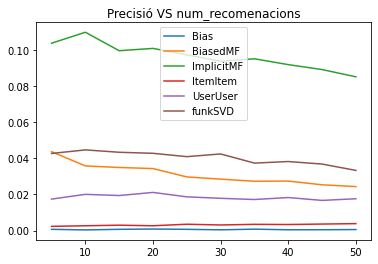

In [48]:
import matplotlib.pyplot as plt


dades = pd.DataFrame(df)
model_names = ["Bias","BiasedMF","ImplicitMF", "ItemItem",
               "UserUser", "funkSVD"]

for model in model_names:
  resultats = dades[dades["Algorithm"] == model]
  plt.plot(resultats["n_rec"], resultats["precisio"], label=model)
plt.legend()
plt.title("Precisió VS num_recomenacions")

Text(0.5, 1.0, 'Recall VS num_recomenacions')

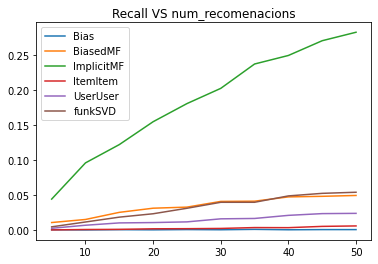

In [49]:
for model in model_names:
  resultats = dades[dades["Algorithm"] == model]
  plt.plot(resultats["n_rec"], resultats["recall"], label=model)
plt.legend()
plt.title("Recall VS num_recomenacions")

# 4.

Desprès de fer moltes proves amb diferents paràmetres, els millos models que hem obtingut son els següents:

Els havía executat separadament, i ara per voler executarlos tots junts em sembla que no arribo a temps... (si ho executes t'hauríen de sortir els resultats de la taula que mostro en la següent cel·la).

In [ ]:
models = {
    "Item": ItemItem(7),
    "User": UserUser(20, 3, 0.1),
    "Biased" : als.BiasedMF(1000, iterations=200,reg=0.2,damping=45),
    "Implicit":als.ImplicitMF(1000, iterations=80, reg=0.25, weight=50),
    "Bias": Bias(damping=50),
    "FunkSVD": funksvd.FunkSVD(500, iterations=250, lrate=5e-2, reg=0.2, damping=25)
}

metriques = [topn.precision]

results = crossvalidar(data.ratings, models, "user", metriques, n_recomenacions=10)
results.groupby("Algorithm").mean()

CROSSVALIDATION
Data: (100836, 4)
Models: ['Item', 'User', 'Biased', 'Implicit', 'Bias', 'FunkSVD']
Splitting: user
Metrics: ['precision']




[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s]

[fold 1 of 5]:   0%|          | 0/6 [00:00<?, ?it/s, model=Item, train=96367, test=4469]

[fold 1 of 5]:  17%|█▋        | 1/6 [00:08<00:42,  8.49s/it, model=Item, train=96367, test=4469]

[fold 1 of 5]:  17%|█▋        | 1/6 [00:08<00:42,  8.49s/it, model=User, train=96367, test=4469]

[fold 1 of 5]:  33%|███▎      | 2/6 [00:10<00:26,  6.52s/it, model=User, train=96367, test=4469]

[fold 1 of 5]:  33%|███▎      | 2/6 [00:10<00:26,  6.52s/it, model=Biased, train=96367, test=4469]

[fold 1 of 5]:  50%|█████     | 3/6 [15:25<13:57, 279.14s/it, model=Biased, train=96367, test=4469]

[fold 1 of 5]:  50%|█████     | 3/6 [15:25<13:57, 279.14s/it, model=Implicit, train=96367, test=4469]

Mostrem els resultats en una taula comparativa:

In [50]:
taula = {"Algorithm":["Bias","BiasedMF","ImplicitMF", "ItemItem", "UserUser", "FunkSVD"],
         "Initial_precison":[0.00, 0.03, 0.10, 0.00, 0.02, 0.04],
         "Best_precision":[0.08, 0.03, 0.36, 0.02, 0.04, 0.14],
         "% difference":[8,0,26,2,2,10]}
display(pd.DataFrame(taula))

,Algorithm,Initial_precison,Best_precision,% difference
0,Bias,0.00,0.08,8
1,BiasedMF,0.03,0.03,0
2,ImplicitMF,0.10,0.36,26
3,ItemItem,0.00,0.02,2
4,UserUser,0.02,0.04,2
5,FunkSVD,0.04,0.14,10
